### **Réalisé par : Mati Maissa et SoualehMohammed Aya**
### **groupe : siq 2**
# Introduction :
Dans le cadre du module analyse des données dans lequel on a abordé plusieurs méthodes de machine learning  , moi et ma binôme, nous nous sommes inspirés de la méthode  de clustering k-means . 
Le clustering K-Means est une méthode d'apprentissage automatique non supervisée populaire qui a été utilisée dans diverses applications, notamment le traitement d'images, la recherche d'informations, les sciences sociales et les prévisions météorologiques. Cependant, le clustering est coûteux en calcul, en particulier lorsqu'il est appliqué à de grands ensembles de données , et à cause de ce dernier on a pensé à accélérer les performances du clustering K-means en utilisant 2 approches    : 

1- la programmation parallèle avec openmp 

2- la programmation parallèle avec cuda c 

# problème proposé : 
Le problème consiste à partitionner un ensemble d’individus en 3 groupes. pour un partitionnement meilleur on est opté pour la méthode K-means (une des méthodes de machine learning ) voici la dataset sur laquelle on appliquera l'algorithme K-means .

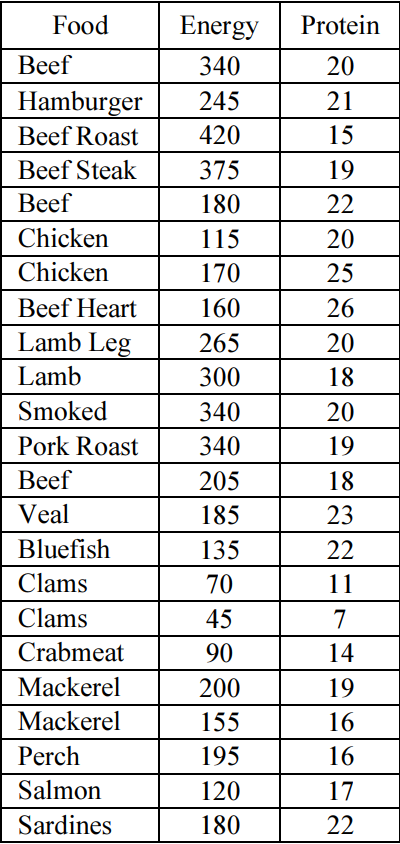

# Algorithme K-means :
1-Partitionner les éléments en q groupes initiaux ;

2-Parcourir la liste des éléments, en attribuant un élément au groupe dont le centroïde (moyenne) est le plus proche. Recalculer le centroïde pour le groupe recevant le nouvel élément et pour le groupe perdant l’élément ;

3-Répéter l’étape 2 jusqu’à ce qu’il n’y ait plus de réaffectations.

# code séquentielle

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cudarepo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.881_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

In [ ]:
!nvcc --version

In [ ]:
!apt list --installed

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

# code séquentielle

In [ ]:

%%cu
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

int main(void) {

  int food [23][2] =
  {{340,20},
  {245,21},
  {420,15},
  {375,19},
  {180,22},
  {115,20},
  {170,25},
  {160,26},
  {265,20},
  {300,18},
  {340,20},
  {340,19},
  {205,18},
  {185,23},
  {135,22},
  {70,11},
  {45,7},
  {90,14},
  {200,19},
  {155,16},
  {195,16},
  {120,17},
  {180,22}};


  float min;
  float c;
  float K_means[23][4];
  float Centre_gravite[3][3] = {{81 ,13 ,0 } ,  {209 , 24 , 0} ,  {303 , 21 , 0} }  ;
  float old_Centre_gravite[3][3];
  int not_equal = 0 ;

//Centres de gravités aléatoires
  //for(int i=0; i<3; i++){
           // Centre_gravite[i][0] = (rand() % (450 + 1 - 40)) + 40 ;
           // Centre_gravite[i][1] = (rand() % (25 + 1 - 5)) + 5 ;
          //  Centre_gravite[i][2] = 0;
        //}
 //première itération

double begin = clock();
 do {

  for(int i =0; i<23; i++){
        for(int j=0; j<3; j++){
            K_means[i][j]= sqrtf (pow((food[i][0]-Centre_gravite[j][0]),2) + pow((food[i][1]-Centre_gravite[j][1]),2));
        }
        min = K_means[i][0];
        K_means[i][3] = 1;
        for(int j =1; j<3; j++){
            if(K_means[i][j]<min){
                min = K_means[i][j];
                K_means[i][3]=j +1;
            }
        }
  }

  printf("\n------------------table de centre de gravite---------------------\n");

  for(int i =0; i<3; i++){
    for(int j=0; j<3; j++){
        printf("%f  |  ",Centre_gravite[i][j]);
    }
    printf("\n");
  }
printf("\n------------------------------------------------------------\n");
printf("\n------------------------------------------------------------\n");

  for(int i =0; i<23; i++){
    for(int j=0; j<4; j++){
        printf("%f  |  ",K_means[i][j]);
    }
    printf("\n");
  }
printf("\n------------------------------------------------------------\n");






//calcule des neauveaux centres de gravité
  for(int i=0; i<3; i++){

    old_Centre_gravite[i][0] = Centre_gravite[i][0];
    old_Centre_gravite[i][1] = Centre_gravite[i][1] ;
    old_Centre_gravite[i][2] = Centre_gravite[i][2];

    Centre_gravite[i][0]=0;
    Centre_gravite[i][1]=0;
    Centre_gravite[i][2]=0;
  }

  for (int i=0; i<23; i++){
    if(K_means[i][3]==1){
        Centre_gravite[0][0]+=food[i][0];
        Centre_gravite[0][1]+=food[i][1];
        Centre_gravite[0][2]++;
    }else{
        if(K_means[i][3]==2){
          Centre_gravite[1][0]+=food[i][0];
          Centre_gravite[1][1]+=food[i][1];
          Centre_gravite[1][2]++;
        }else{
            Centre_gravite[2][0]+=food[i][0];
            Centre_gravite[2][1]+=food[i][1];
            Centre_gravite[2][2]++;
        }
    }
  }

  for(int i=0; i<3; i++){
    Centre_gravite[i][0]=Centre_gravite[i][0]/Centre_gravite[i][2];
    Centre_gravite[i][1]=Centre_gravite[i][1]/Centre_gravite[i][2];
  }

   not_equal = 0 ;
  for(int i=0; i<3; i++){
      for(int j=0; j<3; j++){
        if ( Centre_gravite[i][j] != old_Centre_gravite[i][j]) { not_equal= 1   ; }

      }
      if (not_equal ==  1 ) break ;
  }

  printf("\n  not equal =   %d " , not_equal);
 }
 while ( not_equal == 1 ) ;

double end = clock();
double time_spent = end - begin ;
printf("\n time spent = %f " , time_spent ) ;
  return 0 ;

}


# code avec openmp : 

In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <omp.h>

int main(void) {

  int food [23][2] =
  {{340,20},
  {245,21},
  {420,15},
  {375,19},
  {180,22},
  {115,20},
  {170,25},
  {160,26},
  {265,20},
  {300,18},
  {340,20},
  {340,19},
  {205,18},
  {185,23},
  {135,22},
  {70,11},
  {45,7},
  {90,14},
  {200,19},
  {155,16},
  {195,16},
  {120,17},
  {180,22}};


  float min;
  float c;
  float K_means[23][4];
  float Centre_gravite[3][3] = {{81 ,13 ,0 } ,  {209 , 24 , 0} ,  {303 , 21 , 0} }  ;
  float old_Centre_gravite[3][3];
  int not_equal = 0 ;
  double start , finish ;

//Centres de gravités aléatoires
 // for(int i=0; i<3; i++){
           // Centre_gravite[i][0] = (rand() % (450 + 1 - 40)) + 40 ;
           // Centre_gravite[i][1] = (rand() % (25 + 1 - 5)) + 5 ;
           // Centre_gravite[i][2] = 0;

       // }


 //première itération

 double begin = clock();
 do {

 #pragma omp parallel for
  for(int i =0; i<23; i++){
        for(int j=0; j<3; j++){
            K_means[i][j]= sqrtf (pow((food[i][0]-Centre_gravite[j][0]),2) + pow((food[i][1]-Centre_gravite[j][1]),2));
        }
        min = K_means[i][0];
        K_means[i][3] = 1;
        for(int j =1; j<3; j++){
            if(K_means[i][j]<min){
                min = K_means[i][j];
                K_means[i][3]=j +1;
            }
        }
  }

  printf("\n------------------table de centre de gravite---------------------\n");

  for(int i =0; i<3; i++){
    for(int j=0; j<3; j++){
        printf("%f  |  ",Centre_gravite[i][j]);
    }
    printf("\n");
  }
printf("\n------------------------------------------------------------\n");
printf("\n------------------------------------------------------------\n");

  for(int i =0; i<23; i++){
    for(int j=0; j<4; j++){
        printf("%f  |  ",K_means[i][j]);
    }
    printf("\n");
  }
printf("\n------------------------------------------------------------\n");








//calcule des neauveaux centres de gravité

  for(int i=0; i<3; i++){

    old_Centre_gravite[i][0] = Centre_gravite[i][0];
    old_Centre_gravite[i][1] = Centre_gravite[i][1] ;
    old_Centre_gravite[i][2] = Centre_gravite[i][2];

    Centre_gravite[i][0]=0;
    Centre_gravite[i][1]=0;
    Centre_gravite[i][2]=0;
  }

  for (int i=0; i<23; i++){
    if(K_means[i][3]==1){
        Centre_gravite[0][0]+=food[i][0];
        Centre_gravite[0][1]+=food[i][1];
        Centre_gravite[0][2]++;
    }else{
        if(K_means[i][3]==2){
          Centre_gravite[1][0]+=food[i][0];
          Centre_gravite[1][1]+=food[i][1];
          Centre_gravite[1][2]++;
        }else{
            Centre_gravite[2][0]+=food[i][0];
            Centre_gravite[2][1]+=food[i][1];
            Centre_gravite[2][2]++;
        }
    }
  }

  for(int i=0; i<3; i++){
    Centre_gravite[i][0]=Centre_gravite[i][0]/Centre_gravite[i][2];
    Centre_gravite[i][1]=Centre_gravite[i][1]/Centre_gravite[i][2];
  }

   not_equal = 0 ;
  for(int i=0; i<3; i++){
      for(int j=0; j<3; j++){
        if ( Centre_gravite[i][j] != old_Centre_gravite[i][j]) { not_equal= 1   ; }

      }
      if (not_equal ==  1 ) break ;
  }

  printf("\n  not equal =   %d " , not_equal);
 }
 while ( not_equal == 1 ) ;

double end = clock();
double time_spent = end - begin ;
printf("\n time spent = %f " , time_spent ) ;
  return 0 ;

}


# code avec cuda c  :

In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

  __global__  void distance ( float *k_means  , float *food ,  float *Centre_gravite  ) {
  
  if ( threadIdx.x  < 4 && blockIdx.x < 23 ) {
      k_means[ threadIdx.x  + 4*blockIdx.x]= sqrtf (pow((food[ 2*blockIdx.x ]-Centre_gravite[threadIdx.x*3]),2) + pow((food[2*blockIdx.x + 1]-Centre_gravite[threadIdx.x*3 + 1 ]),2));
    
      __syncthreads () ;

  
  
        if ( threadIdx.x == 0) {
        float min = k_means[4*blockIdx.x] ; 
        k_means[4*blockIdx.x + 3] = 1;
        for(int j =1; j<3; j++){
            if(k_means[ j + 4*blockIdx.x  ]<min){
                min = k_means[j + 4*blockIdx.x];
                k_means[4*blockIdx.x + 3 ]=j +1;
            }
        }
  }
 
}
}
int main(void) {

  float  food [46] =
  {340,20,
  245,21,
  420,15,
   75,19,
  180,22,
  115,20,
  170,25,
  160,26,
  265,20,
  300,18,
  340,20,
  340,19,
  205,18,
  185,23,
  135,22,
  70,11,
  45,7,
  90,14,
  200,19,
  155,16,
  195,16,
  120,17,
  180,22};

  int not_equal = 0 ;
  float k_means[92];
  
  float *D_food, *D_Centre_gravite , *D_k_means   ;

 float Centre_gravite[9] = { 81 ,13 , 0 ,  209 , 24 , 0 ,  303 , 21 , 0 }  ;
 float old_Centre_gravite[9] = { 0 , 0 , 0 ,  0 , 0 , 0 ,  0 , 0 , 0 }  ;
 cudaEvent_t start, stop;
 float elapsedTime;
cudaEventCreate(&start);
cudaEventRecord(start,0);
for(int j=0; j<92; j++){ 
        k_means[j] = 0.0 ; 
    } 

cudaMalloc ((void**) &D_food, 46*sizeof (float));
cudaMalloc ((void**) &D_Centre_gravite, 9*sizeof (float));
cudaMalloc ((void**) &D_k_means,  92*sizeof (float));

cudaMemcpy (D_food, food, 46*sizeof (float),
cudaMemcpyHostToDevice);
cudaMemcpy (D_k_means, k_means, 92*sizeof (float),
cudaMemcpyHostToDevice);

for(int k=0; k<3; k++){
         
cudaMemcpy (D_Centre_gravite, Centre_gravite, 9*sizeof (float),
cudaMemcpyHostToDevice);


distance<<<23,4>>>(D_k_means , D_food ,  D_Centre_gravite ) ;



cudaMemcpy ( Centre_gravite, D_Centre_gravite, 9*sizeof (float),
cudaMemcpyDeviceToHost);
cudaMemcpy ( k_means, D_k_means, 92*sizeof (float),
cudaMemcpyDeviceToHost);



printf("\n------------------table de centre de gravite---------------------\n");

  
    for(int j=0; j<9; j++){
        printf("%f  |  ",Centre_gravite[j]);
    }
    printf("\n");
  
printf("\n------------------------------------------------------------\n");
printf("\n------------------------------------------------------------\n");

    for(int j=0; j<46; j++){ 
        printf("%f  |  ",k_means[j]);
    }
    printf("\n");
  
printf("\n------------------------------------------------------------\n");

for(int i=0; i<3; i++){

    old_Centre_gravite[i] = Centre_gravite[i];
    old_Centre_gravite[i+1] = Centre_gravite[i+1] ;
    old_Centre_gravite[i+2] = Centre_gravite[i+2];

    Centre_gravite[i]=0;
    Centre_gravite[i+1]=0;
    Centre_gravite[i+2]=0;
  }

  for (int i=0; i<23; i++){
    if(k_means[i+ 3]==1){
        Centre_gravite[0]+=food[i+0];
        Centre_gravite[1]+=food[i+1];
        Centre_gravite[2]++;
    }else{
        if(k_means[i+3]==2){      // 115
          Centre_gravite[3]+=food[i+0];
          Centre_gravite[4]+=food[i+1];
          Centre_gravite[5]++;
        }else{
            Centre_gravite[6]+=food[i+0];
            Centre_gravite[7]+=food[i+1];
            Centre_gravite[8]++;
        }
    }
  }

  for(int i=0; i<3; i++){
    Centre_gravite[i]=Centre_gravite[i]/Centre_gravite[i+2];
    Centre_gravite[i+1]=Centre_gravite[i+1]/Centre_gravite[i+2];
  }

not_equal = 0 ;
  for(int i=0; i<9; i++){
        if ( Centre_gravite[i] != old_Centre_gravite[i]) { not_equal= 1   ; }

      if (not_equal ==  1 ) break ;
  } 
 
}

cudaFree (D_food);
cudaFree (D_Centre_gravite);
cudaFree (D_k_means);

cudaEventCreate(&stop);
cudaEventRecord(stop,0);
cudaEventSynchronize(stop);

cudaEventElapsedTime(&elapsedTime, start,stop);
printf("\n Elapsed time : %f ms\n" ,elapsedTime);

return 0 ; 
}

Temps d'exécution
programme séquentiel : 123 ms

programme avec OpenMp: 109 ms

programme avec Cuda : 0.52 ms